# Zhihu Comment Scraping

Code Main reference:</li>
1. https://www.cnblogs.com/mashukui/p/16622995.html
2. https://www.cnblogs.com/mashukui/p/16480182.html
3. And thanks Henry again! (His github: https://github.com/Hsieh-Cheng-Han)`

In [ ]:
# !pip install xlutils

In [ ]:
from requests_html import HTMLSession
import re
import os, xlwt, xlrd
from xlutils.copy import copy


class Spider: 
    def __init__(self): #
        self.urls = ['https://www.zhihu.com/question/462390587/answer/1921307273',
                     'https://www.zhihu.com/question/462391662/answer/2239088069',
                     'https://www.zhihu.com/question/481108926/answer/2072140243',
                     'https://www.zhihu.com/question/462403650/answer/1915565806',
                     'https://zhuanlan.zhihu.com/p/569602799/answer',
                     'https://www.zhihu.com/question/578307077/answer/2847986047',
                     'https://www.zhihu.com/question/451589924/answer/1809230620',
                     'https://www.zhihu.com/question/291994228/answer/601065689',
                     'https://www.zhihu.com/question/381414425/answer/1351963350',
                     'https://www.zhihu.com/question/308724213/answer/672900132',
                     'https://zhuanlan.zhihu.com/p/19799400/answer',
                     'https://www.zhihu.com/question/417154117/answer/1462239359',
                     'https://www.zhihu.com/question/65702211/answer/654578741']  # url to use
        # self.urls = ['https://www.zhihu.com/question/462390587/answer/1921307273'] # testing
        self.url = ''
        self.response = ''
        self.headers = ''
        self.session = HTMLSession()

    def html(self):
        global v
        v = 1
        for url in self.urls:
            num = re.findall('/(.*?)/answer', url)[0].split('/')[-1]  # retrieve id
            self.url = f'https://www.zhihu.com/api/v4/comment_v5/questions/{num}/root_comment?order_by=score&limit=20&offset='
            print(f'这是第{v}个链接评论' + self.url)  # comment page link
            self.get_html(num)
            print(f'第{v}个链接评论已保存')
            v += 1

    def get_html(self, num):
        self.headers = {
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
            'cookie': '_zap=27aa1a2e-d742-4fc3-bb31-2579c8a1d150; d_c0=AFAXmDH_VxaPTq0iWagRkzEL_0e9ddh0cZ4=|1676642490; YD00517437729195%3AWM_TID=MlfqSXdh%2FiRBQRAEVBOQfTerjblI3Zw4; __snaker__id=6OauWLIrluBEFaVb; captcha_ticket_v2=2|1:0|10:1678182619|17:captcha_ticket_v2|704:eyJ2YWxpZGF0ZSI6IkNOMzFfUjhwZUpIQVN0aG4tbUxOWFhtdXFhcnplN0cwOUVXbFpPOUtZcXBoNHp4NzJLMlFGV1MybDJ2NUFWV3VnV3RGWXQxRnV5blNrSExOVEEweGttT2dqTGpJUnMybmZtSnNVN2tBSlVNQnNvZVdudzJ4OEFPZVZaLnB3WlBZNjBWX3I3MjJjMjdnbEVhdGZIeUVUWFUxR0NsYV94dTdPaEJnR1VmaFhkT3FNbjBRQWhZdXh4NWVvanNIbHUtdTlPQzE4Y05zajVWcGRGc0cueFBwb3dSVFdWVjhXNllIWTVkX3dlLXpzeFZLQU1yWVNJOEZjOHRNRFZRNWFQLjFudXhYc0NNY0FRLkFtS0txTERVSmVIejhNeFpJYmVrbG0wOVlZY1loTHk4dW1mWjcwRmF0dUhJVVBqNEhoTUVzd3VNNW9UbmpNQ2lXczd2Nl9lT3d6VzEuU3FZQnNzSFJFU282ZHdfdEZzb2FieXVnWEg5clZvQmpCRDY3d1Y4WS1BU2JYT0QyWFdlSGJwZHBKODhHTGh0SUtodjAxLTJsUEhkMXR5NUVQZmRQUFloRmpZem5LS1pFU3AtSk9QLmw5RkptUHI4MW92cXlQWkVKbW1JTFNGT2R1TWJCUldsWURoaDBTY3p2Z3NxWjlMWmJGSGpvb3FfcHRkSUR1b3ZjMyJ9|3a3a27486c1727abbc7894046c762a544f42ccaca60ca7c1717377ce5ae280c8; captcha_session_v2=2|1:0|10:1680012646|18:captcha_session_v2|88:TnJ0U1B2cWgyNllhd0lEL1hvWjBBT213ZXJZSzNGVm4rOTI5bTB4Q21yTFlxR1VTbkt1Nm1kWGZzeVJORGU2Uw==|633aae365d424db2146f410cadda69b2356ce507472f1d6d79bbbc80cb8fca99; gdxidpyhxdE=fi06SP2QhT9KUHX8h%5CRSTzjib44vuVRNAuyVo5dY7KQOdvzRrQStWwTYs0yKbS%2Bv1iTlHgtvHkclVq79rAEgMAKfTdKJOZJtdf6cbbBtysClTp0a4j0%5Cule6MdlL0ClYIl3n3m9cdIAiq2TPQvU9t9B8CBK%2FsgJqar36WbwEEEGy99E3%3A1680013548715; YD00517437729195%3AWM_NI=xPIWYl1tKu2CW6UilraWME5%2FD3DGAomazMZYPoZQdnRIws%2BGCaHyMSPFtMZHrVlyCf4gbd2AzH%2Bmw2e4NZzf5AkgS8NQEwtvpTlon0UPBpaKDBsKGURml23AL1rsy8mfQTk%3D; YD00517437729195%3AWM_NIKE=9ca17ae2e6ffcda170e2e6ee99ef7ab3ef8ab1cb67b7bc8fb6c44a879b9fadc85ca9a79a88e8678f9700a8c52af0fea7c3b92abc9087b8dc68f3ac8596b14995ea9b8aef7aa38983a6b82588ed8ca8c465afbfb6aed95394b196b2e7669297b994aa4d81bf889ad059949abcaed944b28aa49ac26ef8b9ae85b14bba98e58ef63aa7ec82bbf96ef79fa588d2348e8f8b98f77eb48ca490ed3c97908e91e441889ebdacc65f92b3a4d3b24b90efbe94fc34afba9fb5ea37e2a3; q_c1=5fe7d8366c174ff3b39d35a1fda9a4a4|1680012666000|1680012666000; tst=r; z_c0=2|1:0|10:1680024617|4:z_c0|92:Mi4xNXc0cFJRQUFBQUFBVUJlWU1mOVhGaVlBQUFCZ0FsVk5lVU1RWlFCdXVxaVMwaHYyYjlJNzlsU2hNSHVud2ozNWln|4ca4f5a54c5750b092cb6f0835a3734895e9f46aaa5dfca356fc8e9582fb20e5; _xsrf=f0af7a74-0af1-414b-8f7b-16fca1e8d1b5; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1678182583,1678548689,1680012647,1680108808; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1680140439; unlock_ticket=AIAXg2M3ihYmAAAAYAJVTZ_vJGTrtpHAlRmqLRq2C3fA6zGK40SAoA==; KLBRSID=d6f775bb0765885473b0cba3a5fa9c12|1680141138|1680134460'}
        self.response = self.session.get(url=self.url, headers=self.headers)  # comment page response
        if self.response.json()['data'] == []:  # 区别不同链接
            self.url = f'https://www.zhihu.com/api/v4/comment_v5/articles/{num}/root_comment?order_by=score&limit=20&offset='
            print(f'这是第{v}个链接评论' + self.url)
            print(f'第{v}个链接评论已保存')
            self.response = self.session.get(url=self.url, headers=self.headers)
        # print(self.response.text)
        self.parse(self.response)
        self.page()

    def page(self):
        while True:
            # print(re.findall('paging":\{"is_end":(.*?),',response.text))
            if re.findall('paging":\{"is_end":(.*?),', self.response.text)[0] == 'false':  # 判断是否有异步加载
                next = re.findall('next":"(.*?)","previous', self.response.text)[0].replace('\\u0026', '&')  # 异步加载链接
                # print(next)
                self.response = self.session.get(url=f'{next}', headers=self.headers)
                # print(response_next.text)
                self.parse(self.response)
            else:
                break

    def parse(self, response):
        for data in response.json()['data']:
            # print(data)
            author = data['author']['name']  # retrive username
            content = data['content']  # retriuve content
            content = content.replace('<p>', '').replace('</p>', '')
            print('用户:' + author + '\n' + '评论:' + content + '\n' + '----------------------------')
            # 写入表头
            sheet = f'知乎{v}'
            data1 = {
                sheet: [author, content]
            }
            self.SaveExcels(data1, sheet)
            if data['child_comment_count'] != 0:  # identify whether there is comment or not 
                self.reply(data)

    def reply(self, data):
        id = data['id']  # 被回复用户id
        # print(id)
        url = f'https://www.zhihu.com/api/v4/comment_v5/comment/{id}/child_comment?order_by=ts&limit=20&offset='
        response = self.session.get(url=url, headers=self.headers)  # comment response
        # print(response.text)
        for reply in response.json()['data']:
            # print(reply_1)
            reply_author = reply['author']['name']  # reply user
            reply_content = reply['content']  # reply comment
            reply_content = reply_content.replace('<p>', '').replace('</p>', '')
            print('用户:' + reply_author + '\n' + '评论:' + reply_content + '\n' + '----------------------------')
            # header
            sheet = f'知乎{v}'
            data1 = {
                sheet: [reply_author, reply_content]
            }
            self.SaveExcels(data1, sheet)
        self.page_1(response)

    def page_1(self, response):
        while True:
            # print(re.findall('paging":\{"is_end":(.*?),',response.text))
            if re.findall('paging":\{"is_end":(.*?),', response.text)[0] == 'false':  # 判断回复是否有异步加载
                next = re.findall('next":"(.*?)","previous', response.text)[0].replace('\\u0026', '&')
                # print(next)
                response = self.session.get(url=f'{next}', headers=self.headers)
                # print(response_next.text)
                for data in response.json()['data']:
                    # print(data)
                    author = data['author']['name']
                    content = data['content']
                    content = content.replace('<p>', '').replace('</p>', '')
                    print('用户:' + author + '\n' + '评论:' + content + '\n' + '----------------------------')
                    # 写入表头
                    sheet = f'知乎{v}'
                    data1 = {
                        sheet: [author, content]
                    }
                    self.SaveExcels(data1, sheet)
            else:
                break

    def SaveExcels(self, data, index):
        # 获取表的名称
        sheet_name = [i for i in data.keys()][0]
        # 创建保存excel表格的文件夹
        # os.getcwd() 获取当前文件路径
        os_mkdir_path = os.getcwd() + '/知乎评论test/'
        # 判断这个路径是否存在，不存在就创建
        if not os.path.exists(os_mkdir_path):
            os.mkdir(os_mkdir_path)
        # 判断excel表格是否存在           工作簿文件名称
        os_excel_path = os_mkdir_path + '知乎评论test1.xls'
        if not os.path.exists(os_excel_path):
            # 不存在，创建工作簿(也就是创建excel表格)
            workbook = xlwt.Workbook(encoding='utf-8')
            """工作簿中创建新的sheet表"""  # 设置表名
            worksheet1 = workbook.add_sheet(index, cell_overwrite_ok=True)
            """设置sheet表的表头"""
            sheet1_headers = ('用户', '评论')
            # 将表头写入工作簿
            for header_num in range(0, len(sheet1_headers)):
                # 设置表格长度
                worksheet1.col(header_num).width = 2560 * 3
                # 写入表头        行,    列,           内容
                worksheet1.write(0, header_num, sheet1_headers[header_num])
            # 循环结束，代表表头写入完成，保存工作簿
            workbook.save(os_excel_path)
        """=============================已有工作簿添加新表==============================================="""
        # 打开工作薄
        workbook = xlrd.open_workbook(os_excel_path)
        # 获取工作薄中所有表的名称
        sheets_list = workbook.sheet_names()
        # 如果表名称：字典的key值不在工作簿的表名列表中
        if sheet_name not in sheets_list:
            # 复制先有工作簿对象
            work = copy(workbook)
            # 通过复制过来的工作簿对象，创建新表  -- 保留原有表结构
            sh = work.add_sheet(sheet_name)
            # 给新表设置表头
            excel_headers_tuple = ('用户', '评论')
            for head_num in range(0, len(excel_headers_tuple)):
                sh.col(head_num).width = 2560 * 3
                #               行，列，  内容，            样式
                sh.write(0, head_num, excel_headers_tuple[head_num])
            work.save(os_excel_path)
        """========================================================================================="""
        # 判断工作簿是否存在
        if os.path.exists(os_excel_path):
            # 打开工作簿
            workbook = xlrd.open_workbook(os_excel_path)
            # 获取工作薄中所有表的个数
            sheets = workbook.sheet_names()
            for i in range(len(sheets)):
                for name in data.keys():
                    worksheet = workbook.sheet_by_name(sheets[i])
                    # 获取工作薄中所有表中的表名与数据名对比
                    if worksheet.name == name:
                        # 获取表中已存在的行数
                        rows_old = worksheet.nrows
                        # 将xlrd对象拷贝转化为xlwt对象
                        new_workbook = copy(workbook)
                        # 获取转化后的工作薄中的第i张表
                        new_worksheet = new_workbook.get_sheet(i)
                        for num in range(0, len(data[name])):
                            new_worksheet.write(rows_old, num, data[name][num])
                        new_workbook.save(os_excel_path)

    def run(self):
        self.html()


if __name__ == '__main__':
    spider = Spider()
    spider.run()


# Zhihu Text Analysis

In [2]:
# import all needed libraries
# use snownlp for sentimental analysis
# use sklearn for TF-IFG
# use jieba for tokenization
from snownlp import SnowNLP
from snownlp import sentiment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import jieba
import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# create function to get content
def get_content(content_path):
    with open(content_path,'r', encoding = 'utf-8', errors = 'ignore') as f:
        content= ''
        for i in f:
            i = i.strip()
            content += i
    return content

In [4]:
files = glob.glob('*.txt')
directory_path = "zhihu by year/"
text_files = glob.glob(f"{directory_path}/*.txt")
corpus_files = [get_content(x) for x in text_files]
text_titles = [Path(text).stem for text in text_files] 
text_files

['zhihu by year/2022.txt', 'zhihu by year/2020.txt', 'zhihu by year/2021.txt']

In [5]:
# Step 2:
# 计算每条评论的平均分数
corpus_for_sentiment = [x for x in corpus_files]
lists = [[SnowNLP(ii).sentiments for ii in i] for i in corpus_for_sentiment]

# 计算每条微博的平均分数
avg_list = []
a = 0
for i in lists:
    avg_list.append(np.mean(lists[a]))
    a += 1
avg_list

[0.5167754897314498, 0.5253720531645097, 0.5161025576808154]

In [6]:
full_list = []
for sublist in lists:
    new_list = []
    for item in sublist:
        new_list.append(item)
    full_list.append(new_list)

<AxesSubplot: ylabel='Count'>

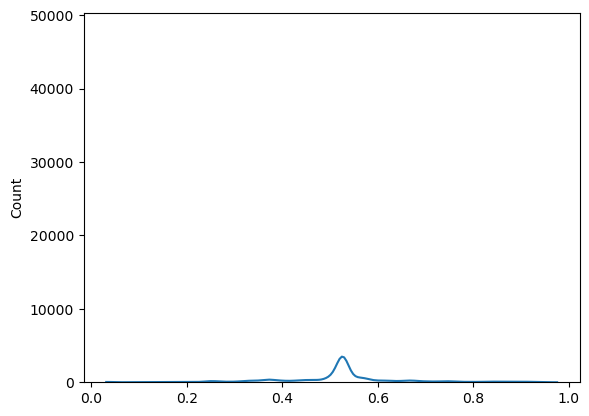

In [7]:
# 绘制舆情分数分布图 - total
# documentation: https://seaborn.pydata.org/tutorial/distributions.html
# total distribution
import seaborn as sns
# 【To Do】需要做成一个total，分别三年的分布
flat_list = [item for sublist in full_list for item in sublist]
data = flat_list
#create density curve to visualize distribution of values
sns.histplot(data, edgecolor="none", alpha= 0.0,  kde= True)
# sns.displot(data, kind='kde')

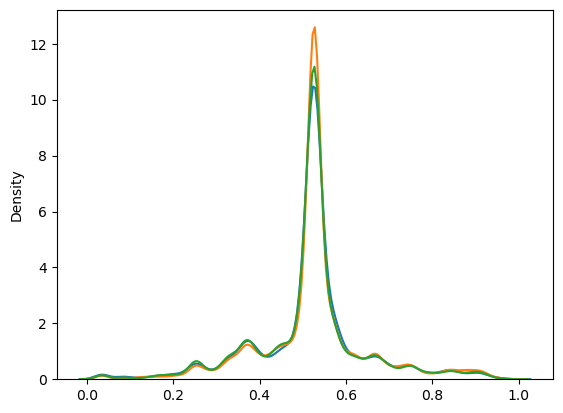

In [8]:
# 绘制舆情分数分布图 - by document 很美但没啥用
for i in full_list:
#     print(max(i), min(i))
    sns.kdeplot(i)
#     sns.displot(i, kind='kde')

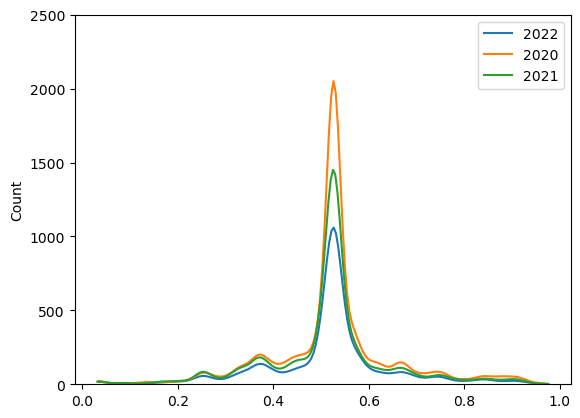

In [9]:
# 绘制舆情分数分布图 - by document
# documentation: https://seaborn.pydata.org/tutorial/distributions.html
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of datasets to plot
# datasets = [sns.load_dataset("tips").total_bill, sns.load_dataset("tips").tip]

# Create a grid of subplots
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Loop through the data sets and draw a histplot on each subplot
for i, data in enumerate(full_list):
    row = i // 4
    col = i % 4
    sns.histplot(data, edgecolor="none", alpha= 0.0,  kde= True)
    plt.legend(loc="upper right", labels= text_titles)

# Show the plot
plt.ylim(0, 2500)
plt.show()

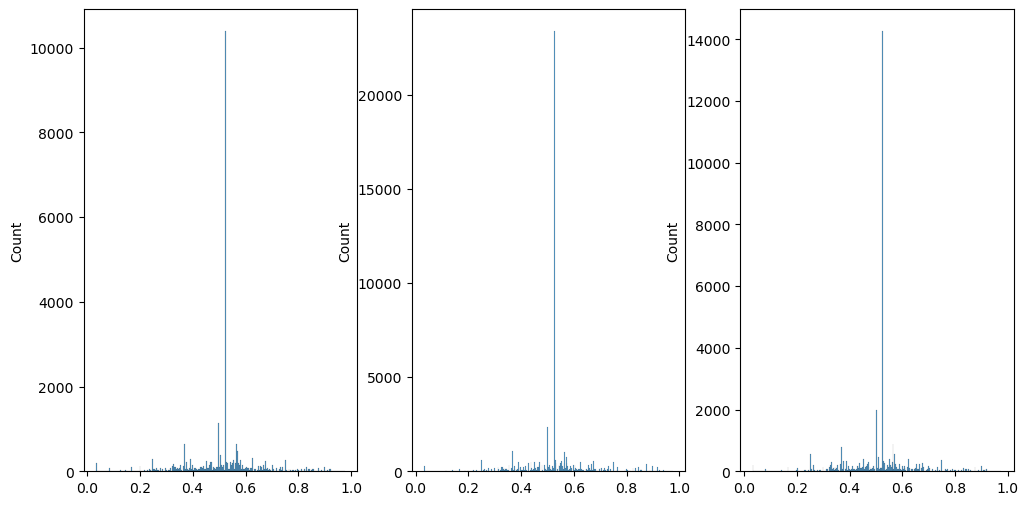

In [10]:
# 绘制舆情分数分布图 - by document

# Create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
# Plot a distplot for each list on a separate subplot
# Reshape axs to be a one-dimensional array
# axs = axs.reshape(-1)
for i,data  in enumerate(full_list):
    sns.histplot(data, ax=axs[i])
# Set the title for each subplot
# Show the plot
plt.show()

In [11]:
# Step3: create stopword list: swl
with open('stopwords.txt', 'r', encoding = 'utf-16') as f:
    lines = f.readlines()
    swl= list()
    for i in lines:
        i = i.replace('\n','')
        swl.append(i)
# swl

In [12]:
# Step4: 分词 &  去除停用词-〉 从这部开始重做，因为我需要的是by document的结果
corpus_list = []
a=0
for i in corpus_files:
    corpus_string = ''.join(i)
    split_words = [x for x in jieba.cut(corpus_string)]
    filtered_words = [word for word in split_words if word not in swl]
    corpus_list.append(filtered_words)
    a += 1

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/92/dd2dtnsn4l77d06s5jjtcfcc0000gn/T/jieba.cache
Loading model cost 0.470 seconds.
Prefix dict has been built successfully.


In [13]:
for i, lst in enumerate(corpus_list):
    new_list_name = f"list_corpus_{i}"
    vars()[new_list_name] = lst  

In [14]:
# TF：计算某个词在文章中出现的总次数
def get_TF(k, words):
    tf_dic = {}
    for i in words:
        tf_dic[i] = tf_dic.get(i,0)+1
    return sorted(tf_dic.items(), key = lambda x:x[1],reverse = True)[:k] #[:k] 是啥

In [15]:
# create word count list
word_count_list = []
for i in corpus_list:
    TF = get_TF(50,i)
    word_count_list.append(TF)
word_count_list

[[('"', 204),
  ('专家', 140),
  ('孩子', 117),
  ('捂脸', 66),
  ('惊喜', 60),
  ('建议', 60),
  ('人口', 60),
  ('br', 55),
  ('罚款', 44),
  ('大笑', 42),
  ('生育', 38),
  ('飙泪', 36),
  ('不生', 35),
  ('砖家', 33),
  ('结婚', 28),
  ('钱', 28),
  ('中国', 27),
  ('社会', 26),
  ('多生', 26),
  ('政策', 26),
  ('思考', 25),
  ('工作', 24),
  ('国家', 24),
  ('doge', 22),
  ('生气', 19),
  ('房子', 18),
  ('嘴', 18),
  ('年轻人', 18),
  ('捂', 17),
  ('一个月', 17),
  ('幸福', 17),
  ('计划生育', 17),
  ('四害', 16),
  ('data', 16),
  ('强制', 16),
  ('家庭', 16),
  ('赞', 15),
  ('公务员', 15),
  ('吃瓜', 15),
  ('税', 14),
  ('两个', 14),
  ('养老', 14),
  ('尴尬', 14),
  ('单身', 13),
  ('减少', 13),
  ('工资', 13),
  ('少生', 12),
  ('标语', 12),
  ('生育率', 11),
  ('社保', 11)],
 [('孩子', 273),
  ('"', 202),
  ('br', 194),
  ('父母', 190),
  ('二胎', 151),
  ('人口', 102),
  ('妹妹', 96),
  ('政策', 88),
  ('计划生育', 75),
  ('弟弟', 74),
  ('生育', 74),
  ('生二胎', 69),
  ('女儿', 68),
  ('两个', 59),
  ('照顾', 50),
  ('儿子', 48),
  ('妈妈', 46),
  ('意愿', 46),
  ('中国', 46),
  ('经济', 45),
  ('

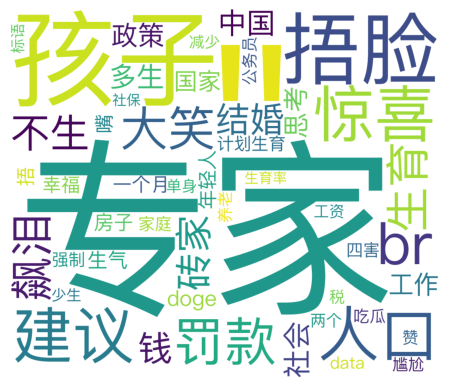

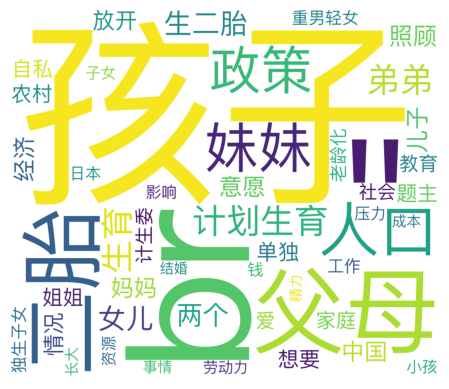

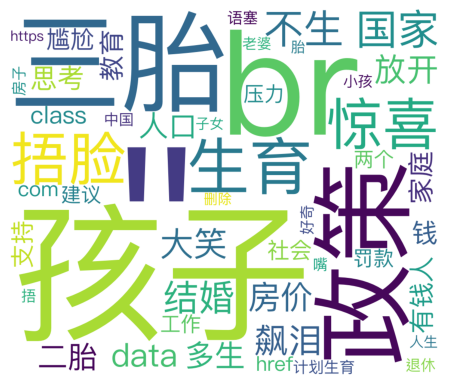

In [16]:
# Create word clouds
for TF in word_count_list:
    TF_dic = dict((x, y) for x, y in TF)
    wc = WordCloud(font_path='/System/Library/fonts/PingFang.ttc', background_color="white", width=1000, height=860)  
    wen = wc.generate_from_frequencies(TF_dic)
    
    # Display the wordcloud
    plt.figure()
    plt.imshow(wen)
    plt.axis("off")
    plt.show()

In [17]:
# Step7.1: word list & flatten world list

# filter_words by weibo
# wl = [[] for _ in range(len(corpus))]
wl = []
a=0
for i in corpus_files:
    corpus_string_2 = ''.join(i)
    split_words = [x for x in jieba.cut(corpus_string_2)]
    filtered_words = [word for word in split_words if word not in swl]
    wl.append(filtered_words)
    a += 1

flat_wl = [item for sublist in wl for item in sublist]
# flat_wl
# wl

In [18]:
# Step 7.2: Tokenizing & removing stop word with my swl
corpus_list = []
a=0
for i in corpus_files:
        corpus_string = ''.join(i)
        split_words = [x for x in jieba.cut(corpus_string)]
        filtered_words = [word for word in split_words if word not in swl]
        corpus_list.append(filtered_words)
        a += 1

len(corpus_list)

3

In [19]:
# Step 7.3: create a flat word list to create tfidf table
# TD-IDF from scratch: https://www.askpython.com/python/examples/tf-idf-model-from-scratch
flat_corpus_list = []
word_set = []
for sublist in corpus_list:
    for element in sublist:
        flat_corpus_list.append(element)
print(len(flat_corpus_list))
word_set = set(flat_corpus_list)
print(len(word_set))
flat_corpus_list
#Total documents in our corpus
total_documents = len(corpus_list)
print(total_documents)

27266
8298
3


In [20]:
#Step 7.4: Creating an index for each word in our vocab. # I don't know whether this is necessary but sure
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1
# index_dict 

In [21]:
#Step 7.5: Create a count dictionary

def count_dict(sentences):
    word_count = {}
    for word in word_set:
        
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count
 
word_count = count_dict(corpus_list)

In [22]:
#Step 7.6: Define function of: Term Frequency/Inverse Document Frequency/TF-IDF

# Term Frequency
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token == word])
    return occurance/N


#Inverse Document Frequency
 
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)

# Combining the TF-IDF functions
def tf_idf(sentence):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
        tf = termfreq(sentence,word)
        idf = inverse_doc_freq(word)
        value = tf*idf
        tf_idf_vec[index_dict[word]] = value
    return tf_idf_vec


In [23]:
# Step 7.7: TF-IDF Encoded text corpus
vectors = []
for sent in corpus_list:
    vec = tf_idf(sent)
    vectors.append(vec)

print(vectors[0])


[-4.52188105e-05 -5.29060083e-03  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [24]:
# Step 7.8: Create the TF-IDF df
tfidf_df = pd.DataFrame(vectors, index=text_titles, columns=index_dict) # 我其实不知道这个column对不对
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term'})
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

,document,term,tfidf
14048,2020,单独,0.001332
10748,2020,题主,0.001267
12675,2020,预测,0.000682
11915,2020,剩女,0.000617
11942,2020,弟妹,0.000520
15882,2020,我弟,0.000520
16401,2020,长辈,0.000487
9089,2020,辛苦,0.000455
14271,2020,下场,0.000455
10336,2020,讨厌,0.000422


In [27]:
# Step 7.9: Select the top TF-IDF words
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf.head(50)

,document,term,tfidf
14048,2020,单独,0.001332
10748,2020,题主,0.001267
12675,2020,预测,0.000682
11915,2020,剩女,0.000617
11942,2020,弟妹,0.000520
15882,2020,我弟,0.000520
16401,2020,长辈,0.000487
9089,2020,辛苦,0.000455
14271,2020,下场,0.000455
10336,2020,讨厌,0.000422


In [28]:
# Step 7.10: Draw heat map of top_tfidf
import altair as alt
import numpy as np

term_list  = ['单独', '剩女', '躺平', '配套', '征税', '长辈'] # change manually based on result of previous cell

top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001


# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)


# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode( # include a circle with a size of 100
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list), 
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 400, height = 300)


alt.LayerChart(...)